# Le "Shock Tube" de Sods

Nous allons résoudre le "Shock Tude" de Sods. Le tube est long de 20cm. Au milieu, en x = 0, il y a un diaphragme rigide infinitisément fin séparant le tube en 2. De part et d'autre se trouve deux gaz à différente pression et densité. Ces gaz sont initialement à une vitesse nulle. A gauche, le gaz a une densité de 1 kg/m³ et une pression de 100kN/m². A droite, la densité est de 0.125 kg/m³ et la pression est de 10 kN/m².

L'équation à résoudre est la suivante :
\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]
+ \frac{\partial}{\partial x}
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
=0
\end{equation}

Le premier vecteur est u et le second est f.

Les conditions initiales peuvent être réécrites plus clairement comme :

$$\underline{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$\underline{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$


On commence comme d'habitude par importer la bibliothèque numpy.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

Nous introduisons ici nous conditions initiales, les pas et leur nombre respectif.

In [2]:
nx = 81
dx = .25
dt = .0002   
gamma = 1.4
nt=0.01/dt
rhol=1
ul=0
pl=100000
rhor=0.125
ur=0
pr=10000

On définit ensuite la fonction t(u). Cette fonction permettra de calculer le vecteur f à partir du vecteur u. Comme ce caclcul apparait souvent, cela rendra le code plus lisible.

In [3]:
def t(u):
    return numpy.array([u[1], u[1]**2/u[0]+(gamma-1)*(u[2]-u[1]**2/(2*u[0])),\
                                                          (u[2]+(gamma-1)*(u[2]-u[1]**2/(2*u[0])))*u[1]/u[0]])

Si l'on pose :

$$\underline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

On peut réécrire f sous la forme suivante, ce qui permettra de le calculer à partir de n'importe quel vecteur u.

$$\underline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

Pour calculer f, comme la fonction t reçoit un vecteur et pas un tableau, nous avons défini juste avant un vecteur ui qui reçoit une ligne du tableau u afin d'envoyer ce dernier dans la fonction t et avoir la ligne du tableau f correspondant.

In [4]:
x = numpy.linspace(-10,10,nx)

gauche = numpy.where(x<0)
droite = numpy.where(x>=0)
s=numpy.empty((nx,3))
s[gauche] = numpy.array([rhol, ul, pl])
s[droite] = numpy.array([rhor, ur, pr])

u=numpy.empty((nx,3))
for i in range (nx):
    u[i]=numpy.array([s[i,0], s[i,0]*s[i,1], s[i,2]/(gamma-1)+(s[i,0]*s[i,1]**2)/2])

f=numpy.empty((nx,3))
for i in range (nx):
    ui=u[i,:]
    f[i]= t(ui)

Ici, nous avons employé la méthode de Richtmyer afin de déterminer l'évolution du système après 0.001s. Sa méthode est la suivante :

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}

In [5]:
for n in range(1,51):  
    un = u.copy()
    fn = f.copy()
    for i in range(1,nx-1):
        v = 1/2*(un[i+1]+un[i]) - dt/(2*dx)*(fn[i+1]-fn[i])
        w = 1/2*(un[i]+un[i-1]) - dt/(2*dx)*(fn[i]-fn[i-1])
        u[i] = un[i] - dt/dx*(t(v)-t(w))
        for i in range (nx):
            ui=u[i,:]
            f[i]= t(ui)

Ici, après avoir calculé u à 0.01s, nous pouvons maintenant retrouver à l'aide de celui-ci les trois données qui nous sont demandées et nous les introduisont dans le tableau solution s. Nous faisons ici le chemin inverse du début où nous avons construit u à partir de s.

In [6]:
for i in range (nx):
            s[i,:]=numpy.array([u[i,0], u[i,1]/u[i,0], (gamma-1)*(u[i,2]- u[i,1]**2/(2*u[i,0]))])

La solution à x = 2.5 m est la suivante :

In [7]:
print ("La densité est de",s[50,0],"kg/m³")
print ("La vitesse est de",s[50,1],"m/s")
print ("La pression est de",s[50,2],"N/m²")

La densité est de 0.374691402648 kg/m³
La vitesse est de 292.611471527 m/s
La pression est de 30250.8901676 N/m²


Il nous reste à afficher les graphiques de la solution après t = 0.01 s tout le long du tube.

In [8]:
def graph(y):
    pyplot.figure(figsize=(5,5))
    pyplot.grid(True)
    pyplot.plot(x,y)

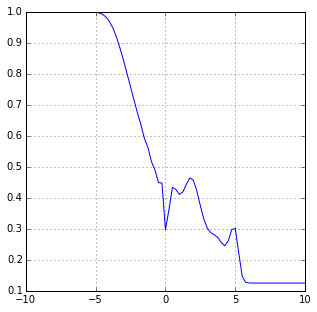

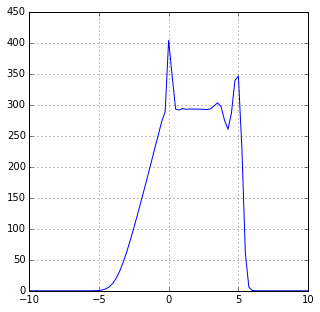

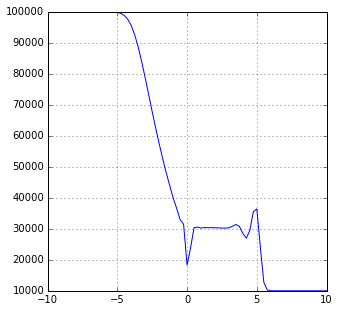

In [9]:
graph(s[:,0])
graph(s[:,1])
graph(s[:,2])

Nous remarquons des pics au niveau des extrémités. Ces pics sont indissociables à une résolution numérique d'une séquation comme expliquer dans les Notebooks.

Enfin, nous vérifions que la condition CFL soit bien respectée. Pour cela, nous devons définir le vecteur $\underline{\mathbf{c}}$ comme suit :

\begin{equation} 
\underline{\mathbf{c}} = \frac{\partial \underline{\mathbf{f}}}{\partial \underline{\mathbf{u}}}
\end{equation}

Ce qui nous donne :

$$\underline{\mathbf{c}} = \left[ \begin{array}{c}
\ 0 \\ 2 \frac{u_2}{u_1}+(1 - \gamma)\frac{u_2}{u_1}  \\ \gamma \frac{u_2}{u_1} \\ \end{array}\right] $$

La condition CFL impose que :

$$\underline{\mathbf{c}} \frac{dt}{dx} < \underline{\mathbf{1}}$$ 

In [10]:
c=numpy.empty(3)
c=numpy.array([0,max((2*u[:,1]/u[:,0])+(1-gamma)*u[:,1]/u[:,0]),max((u[:,1]/u[:,0])*gamma)])
c*dt/dx

array([ 0.        ,  0.51711507,  0.45247569])

La condition de stabilité est donc bel et bien respectée.